In [42]:
import pandas as pd
from sklearn.datasets import load_iris

In [43]:
data = load_iris()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Split the data into training and testing sets

In [69]:
from sklearn.model_selection import train_test_split
x = dataset.copy()
y = data['target']
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=20)

In [75]:
from sklearn.tree import DecisionTreeClassifier
clt = DecisionTreeClassifier(ccp_alpha=0.02)
clt =clt.fit(x_train,y_train)

In [ ]:
clt.get_params()

In [70]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
27,5.2,3.5,1.5,0.2
56,6.3,3.3,4.7,1.6
133,6.3,2.8,5.1,1.5
38,4.4,3.0,1.3,0.2
35,5.0,3.2,1.2,0.2
89,5.5,2.5,4.0,1.3
37,4.9,3.6,1.4,0.1
87,6.3,2.3,4.4,1.3
55,5.7,2.8,4.5,1.3
123,6.3,2.7,4.9,1.8


In [71]:
len(x_test)


20

In [72]:
len(dataset)

150

 Make predictions on the testing set

In [76]:
predictions = clt.predict(x_test)
predictions

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2])

In [10]:
#difference between tree that doesn't have stopping criteria and the one that does
clt.predict_proba(x_test)

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.03448276, 0.96551724],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.03448276, 0.96551724],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

Calculate the accuracy of the model

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.94

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[16,  0],
       [ 0, 14]])

In [13]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average='micro')

0.94

In [14]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average='micro')

0.94

Train the decision tree model

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Iris-Virginica','Iris-Setosa','Iris-Versicolour']))

                  precision    recall  f1-score   support

  Iris-Virginica       1.00      1.00      1.00        16
     Iris-Setosa       0.82      1.00      0.90        14
Iris-Versicolour       1.00      0.85      0.92        20

        accuracy                           0.94        50
       macro avg       0.94      0.95      0.94        50
    weighted avg       0.95      0.94      0.94        50



In [16]:
feature_names = x.columns
feature_names

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [17]:
clt.feature_importances_

array([0.        , 0.        , 0.58151995, 0.41848005])

Text(0.5, 1.0, 'Decision tree trained on iris features')

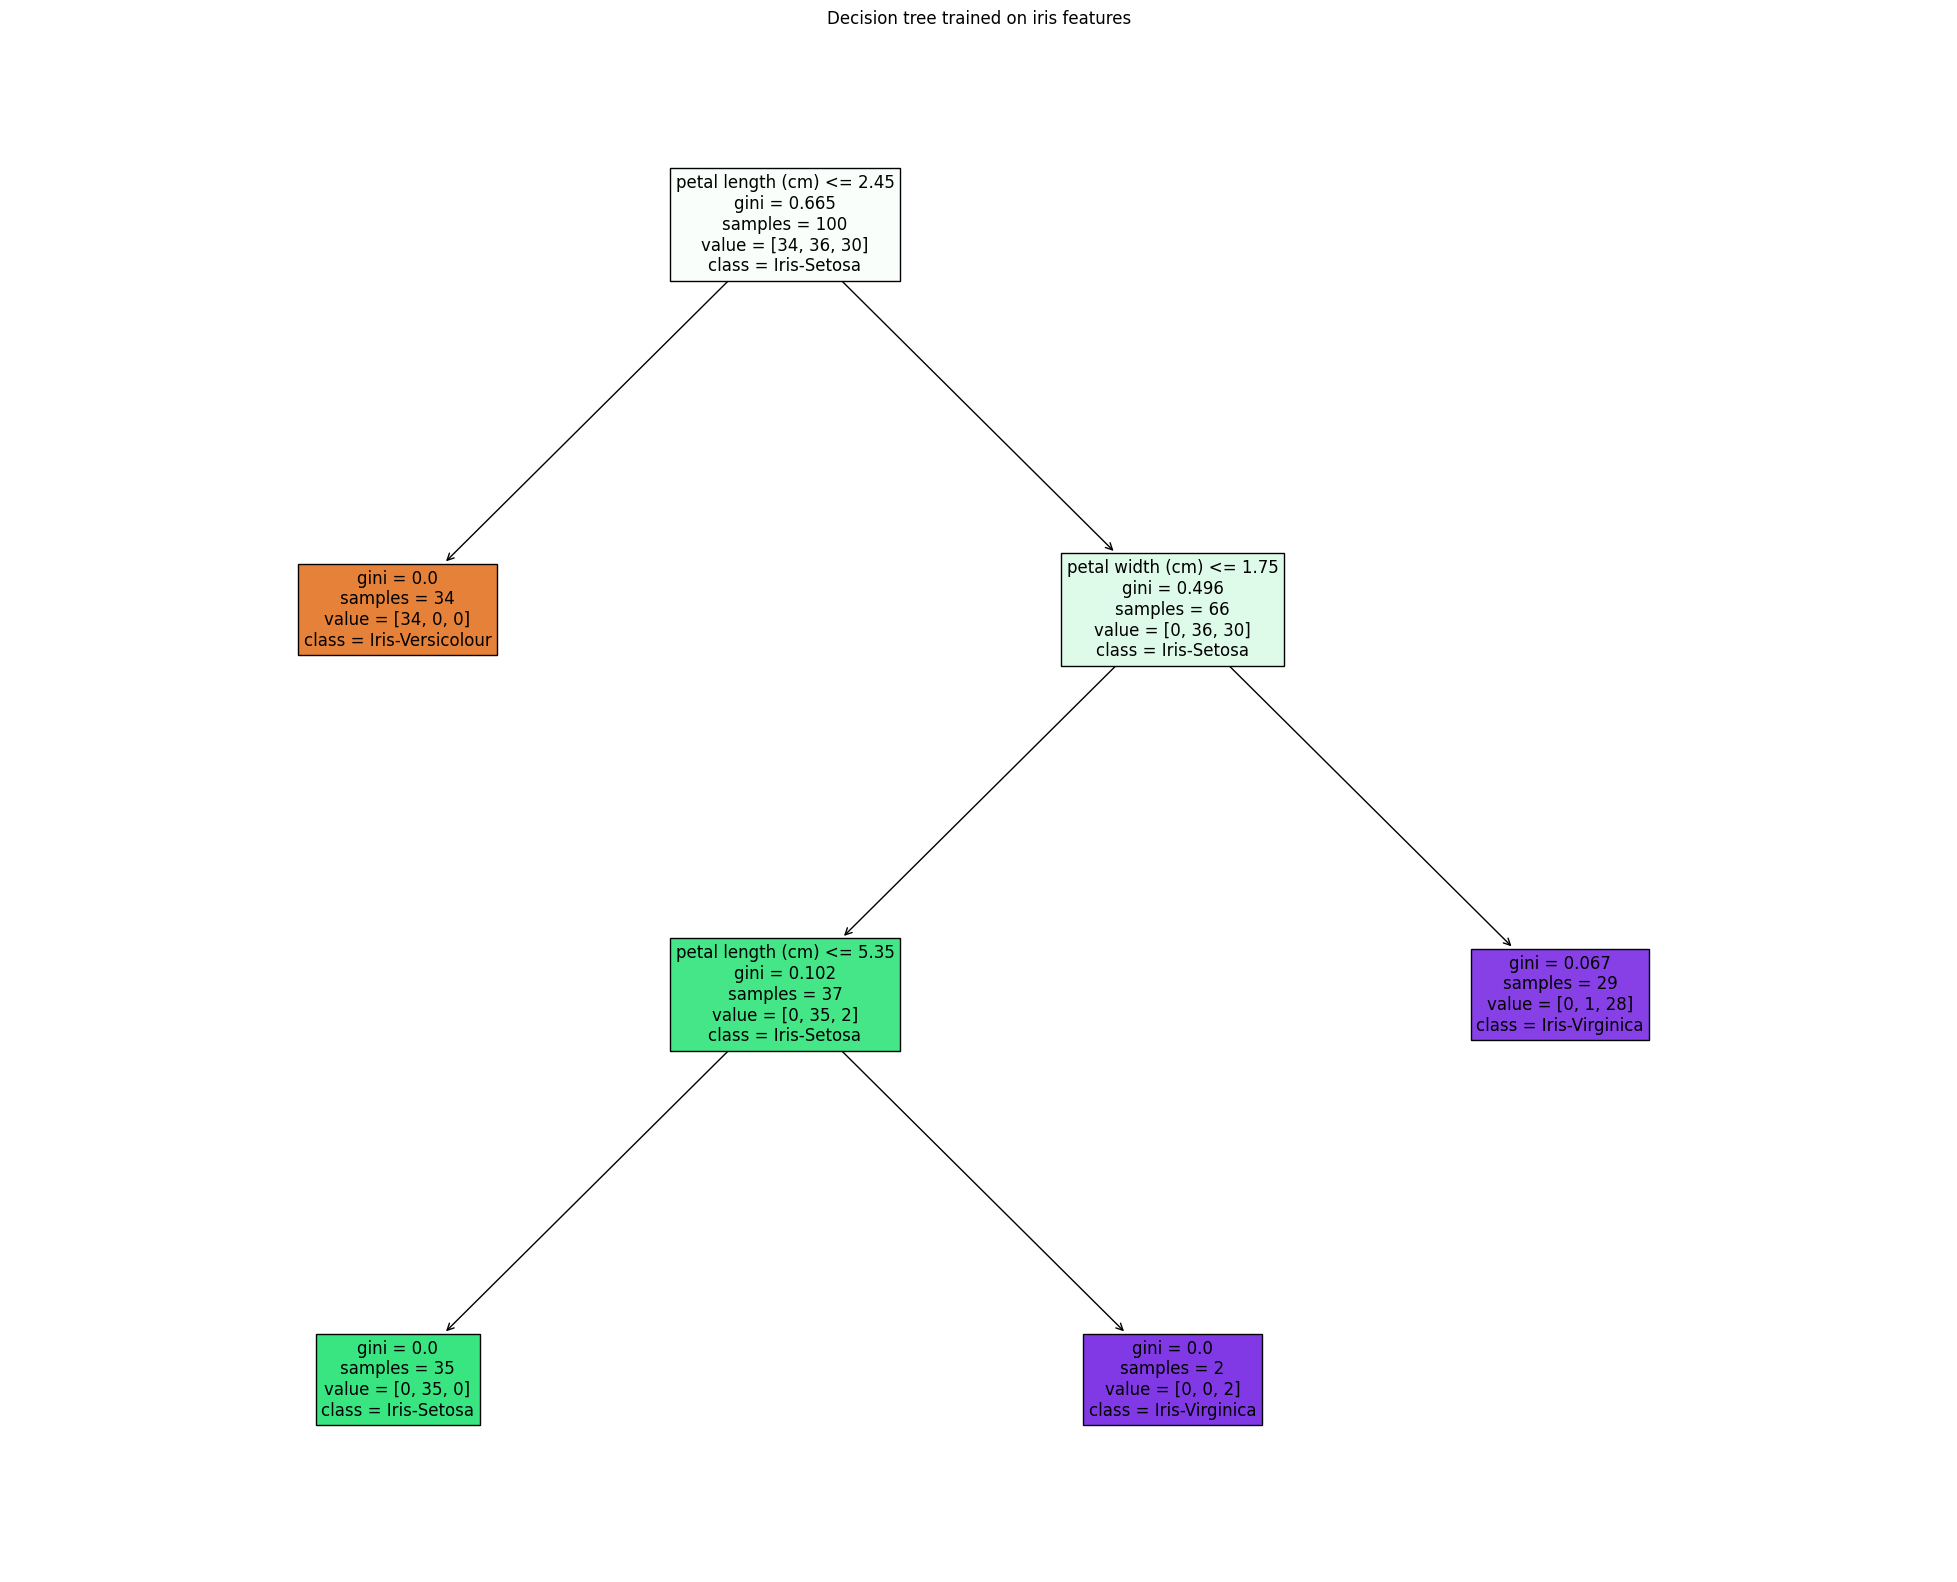

In [20]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clt, feature_names=feature_names,class_names={0:'Iris-Versicolour', 1:'Iris-Setosa', 2:'Iris-Virginica'},
                   filled=True,
                   fontsize=12)
plt.title("Decision tree trained on iris features")

In [74]:
data=dataset.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])